In [7]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel_masked as rk
from scipy.integrate import quad

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [8]:
nside=8 ; ell=arange(3*nside+1) ; npix=h.nside2npix(nside)
beta0=min(180,180*24./(3.*nside)) ; xsize=400 ; reso=1.5*beta0*60./xsize
betafull=10.
y=rk.real_space_queb_kernels(nside,tmax=betafull,maxlmax=3*nside,sampling=2500)

In [9]:
lmin=2 ; lmax=3*nside 
y.calc_qu2eb_rad_kernel(lmax,lmin)
y.calc_qu2queb_rad_kernel(lmax,lmin)
y.setup_fn_rad_ker()

In [10]:
theta0=30. ; phi0=0.
cpix=h.ang2pix(nside,theta0*pi/180.,phi0*pi/180.)
theta,phi=h.pix2ang(nside,cpix)
theta=theta*180./pi ; phi=phi*180/pi ; print theta,phi

35.6590876961 7.5


In [11]:
tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][cpix]=1.
alm=h.map2alm(tqu,lmax=lmax,pol=True,iter=0) ; tebq=h.alm2map(alm,nside,pol=False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [12]:
rteb=y.convert_qu2eb(tqu)

Computing on all pixels


<IPython.core.display.Javascript object>


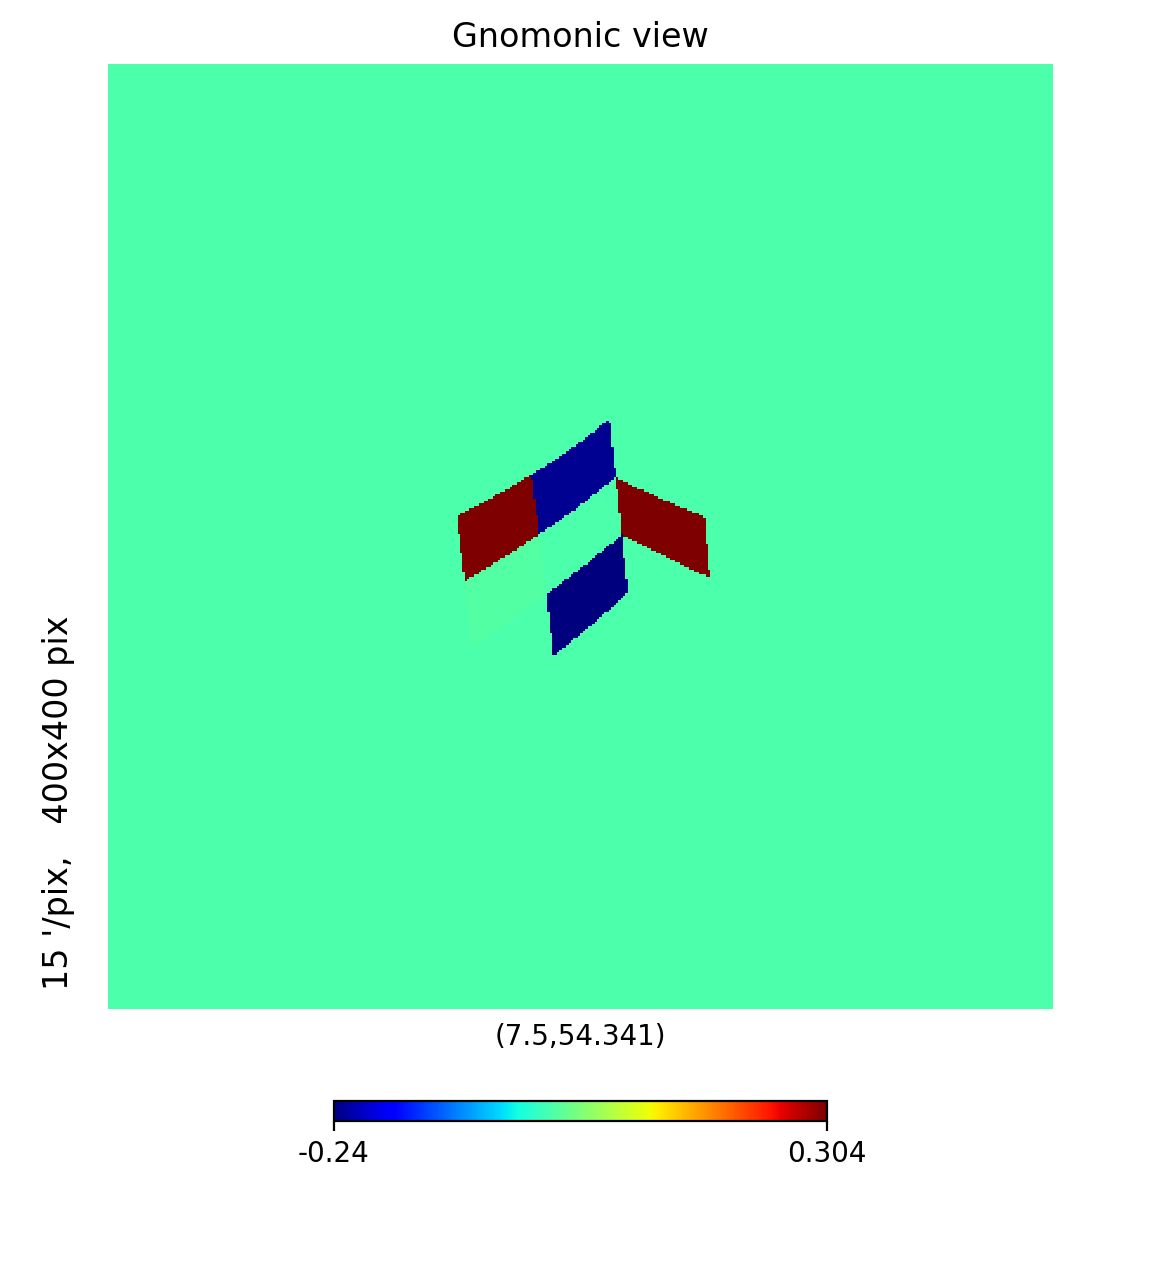

<IPython.core.display.Javascript object>


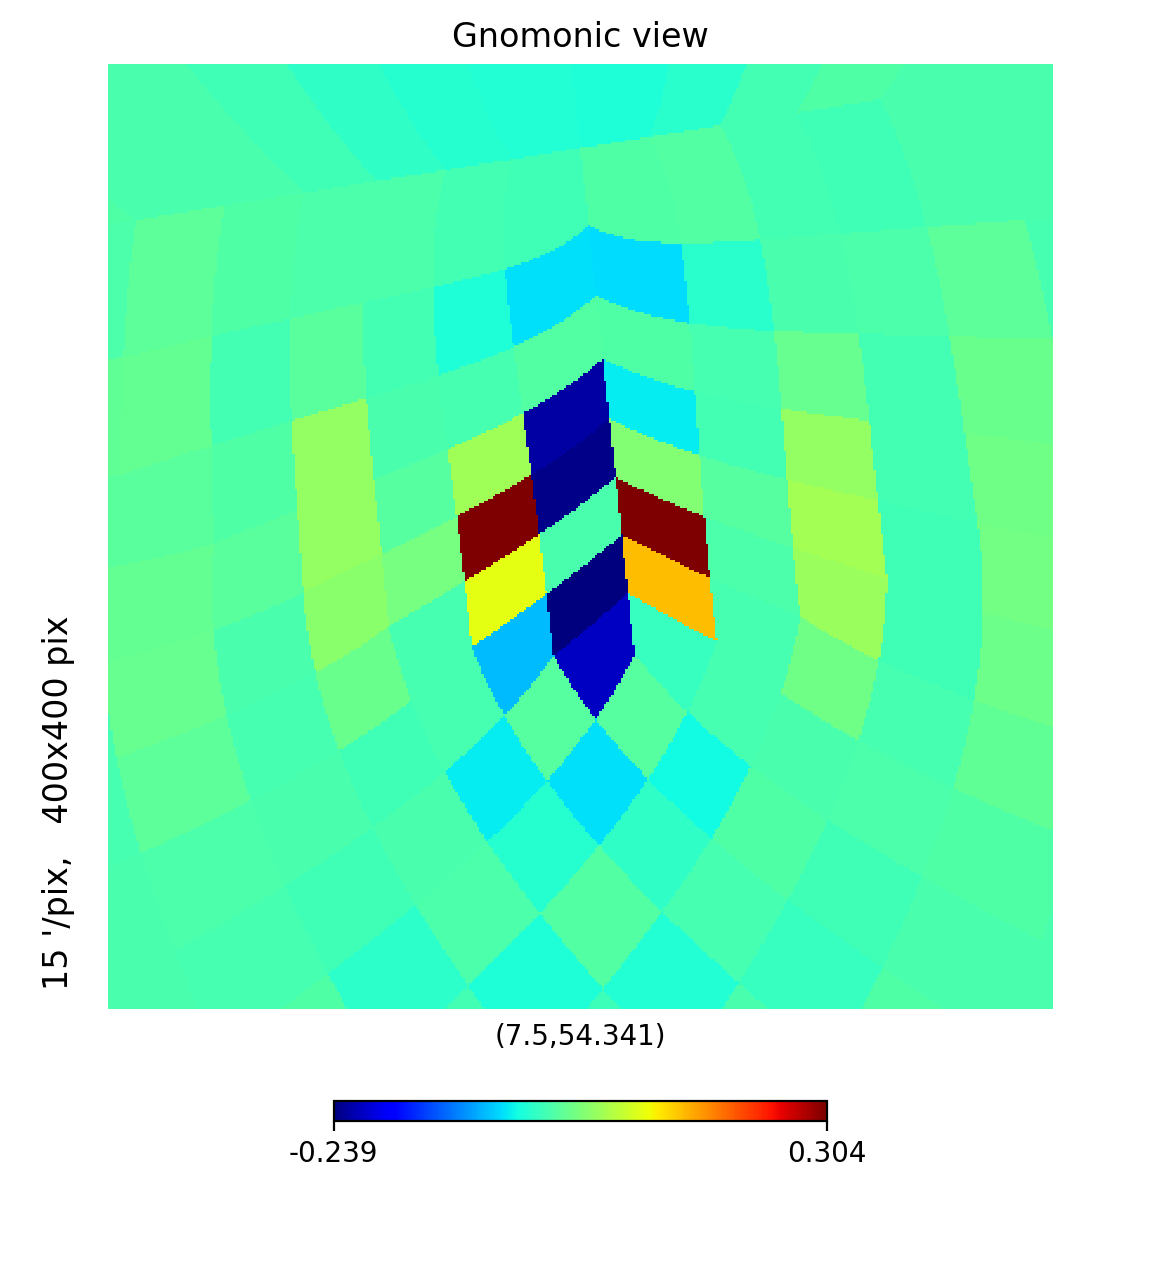

In [15]:
h.gnomview(rteb[1],rot=(phi,90-theta),xsize=400,reso=15)
h.gnomview(tebq[1],rot=(phi,90-theta),xsize=400,reso=15)